## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df = pd.read_csv(r'C:\spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df = df.drop(columns = {'Unnamed: 0','label'})

In [5]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df.shape

(5171, 2)

## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


## Checking for duplicates and removing if any present

In [8]:
df.duplicated().sum()

178

In [9]:
df = df.drop_duplicates()

In [10]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
df.shape

(4993, 2)

[]

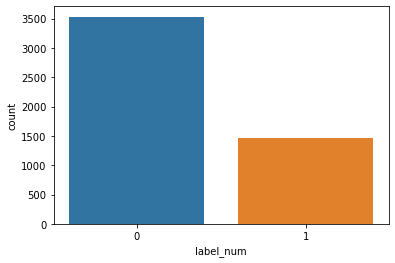

In [12]:
sns.countplot(x = df['label_num'])
plt.plot()

## All set! Let's start preprocessing

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [14]:
def transform_mail(mail):
    transformed_mail = []
    temp = []
    mail = mail.lower()
    mail = word_tokenize(mail)
    
    for i in mail:
        for j in i.split():
            if i.isalnum():
                temp.append(i)
    for i in temp:
        if i not in stopwords.words('english'):
            transformed_mail.append(i)
    temp = transformed_mail
    transformed_mail = []
    
    
    ps = PorterStemmer()
    for p in temp:
        stemmed_words = ps.stem(p)
        transformed_mail.append(stemmed_words)
    
    return ' '.join(transformed_mail)

In [15]:
# sample text
transform_mail("enron methanol ; meter # : 988291\r\n")

'enron methanol meter 988291'

In [ ]:
# We have made a seperate column of transformed text from our text(original column) 

In [16]:
df['TRANSFORMED_TEXT'] = df['text'].apply(transform_mail)
df.head()

,text,label_num,TRANSFORMED_TEXT
0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


In [17]:
X = df['TRANSFORMED_TEXT']
y = df['label_num']

In [18]:
X[:5]

0    subject enron methanol meter 988291 follow not...
1    subject hpl nom januari 9 2001 see attach file...
2    subject neon retreat ho ho ho around wonder ti...
3    subject photoshop window offic cheap main tren...
4    subject indian spring deal book teco pvr reven...
Name: TRANSFORMED_TEXT, dtype: object

## Feature Extraction

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
X_train_tfidf = vectorizer.fit_transform(X)

In [ ]:
## Splitting the data(80:20 ratio)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df['label_num'], test_size = 0.2, random_state = 42)

## Creating our learning model

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
##SVM
svm = SVC(kernel = 'rbf')

In [ ]:
## GridSearchCV method for hyperparameter tuning

In [25]:
param_grid = {'C':[0.001,0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(svm, param_grid, refit = True)
grid_model= grid.fit(X_train, y_train)
grid_svm_pred = grid_model.predict(X_test)

In [26]:
svm_count_accuracy = accuracy_score(y_test, grid_svm_pred)

In [27]:
print(f'Accuracy for SVM model is : {svm_count_accuracy*100} %')

Accuracy for SVM model is : 98.2982982982983 %


In [ ]:
## Accuracy achieved : 98%(approx.)

In [ ]:
## Visual analysis of performance of our model through confusion_matrix

[]

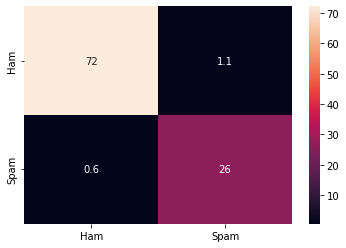

In [28]:
cm = confusion_matrix(y_test, grid_svm_pred)
sns.heatmap((cm/np.sum(cm))*100, annot = True, xticklabels = ['Ham','Spam'], yticklabels = ['Ham','Spam'])
plt.plot()

In [ ]:
## THE END